<b>PART-II<b>


<b>Used Arima model for crop price prediction(wheat price of Pune)<b>


In [1]:
import warnings 
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
fields = ['Modal_Price', 'Price_Date']
df= pd.read_csv("./Processed_Data/Test.csv",skipinitialspace=True, usecols=fields)

In [3]:
df.Price_Date = pd.to_datetime(df.Price_Date, errors='coerce')

In [4]:
df=df.set_index('Price_Date')

In [5]:
df.head(2)

,Modal_Price
Price_Date,
2015-01-01,1700
2015-01-02,1500


In [6]:
data = df.copy()
y = data

In [7]:
y

,Modal_Price
Price_Date,
2015-01-01,1700
2015-01-02,1500
2015-01-03,1950
2015-01-04,1800
2015-01-05,2025
...,...
2024-12-24,4500
2024-12-26,3000
2024-12-27,3000


In [8]:
# The 'MS' string groups the data in buckets by start of the month
y = data['Modal_Price'].resample('MS').mean()

# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())

print(y)

Price_Date
2015-01-01    1770.307692
2015-02-01    1950.642857
2015-03-01    1846.285714
2015-04-01    1619.178571
2015-05-01    1708.793103
                 ...     
2024-08-01    2787.466667
2024-09-01    2729.066667
2024-10-01    2797.923077
2024-11-01    2750.125000
2024-12-01    3662.500000
Freq: MS, Name: Modal_Price, Length: 120, dtype: float64


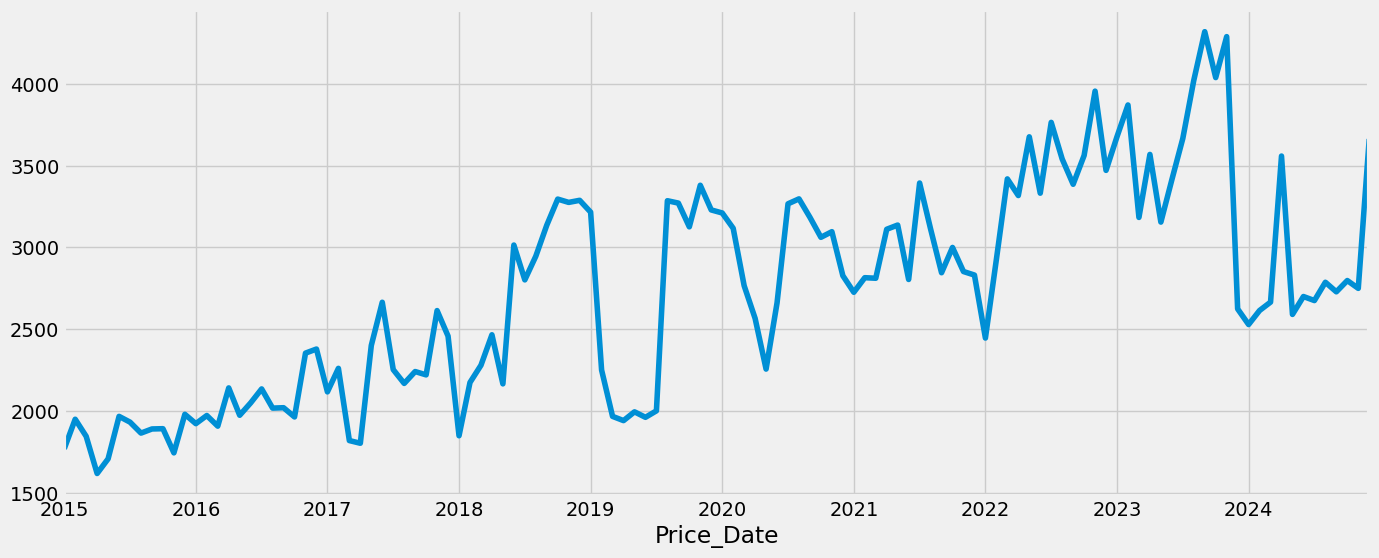

In [9]:
y.plot(figsize=(15, 6))
plt.show()

In [10]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [11]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2230.0743730287177
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1889.0996605421506
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1677.283600936092
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1493.0715336721178
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1693.7512792620685
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1666.609025662781
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1508.9992042207386
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1484.1309728138938
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2069.6252452420413
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1761.4621434819383
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1622.345035762702
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1438.2817235850302
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1653.2102288560077
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1609.6644101756085
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1469.8836418422725
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1436.9760751314009
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1729.6079759473425
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1565.580776674

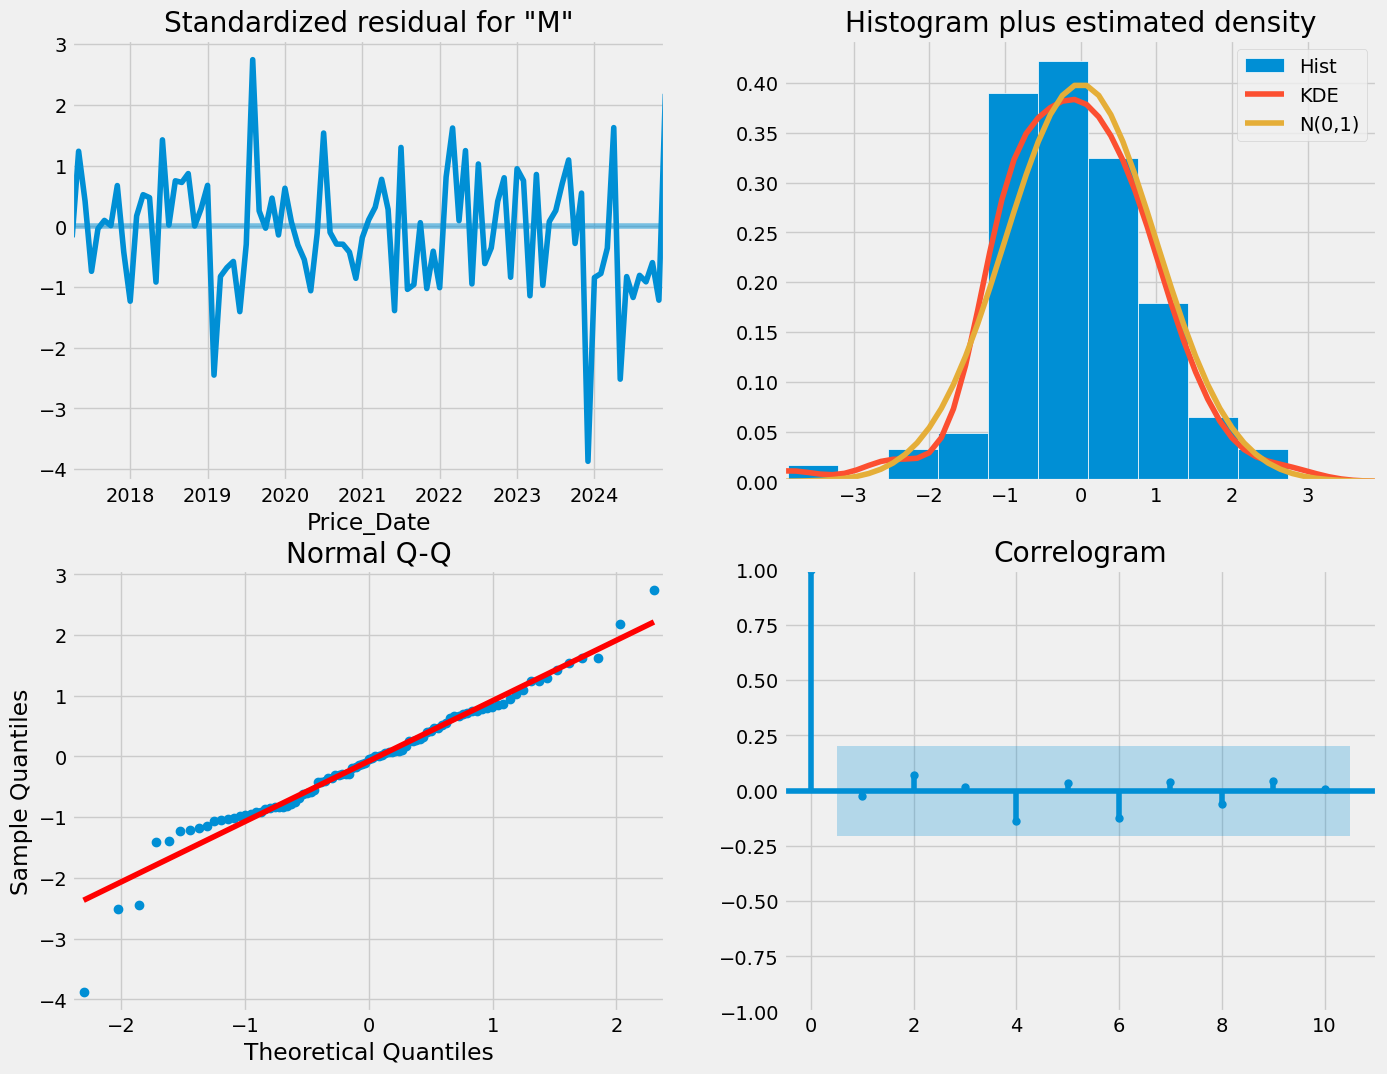

In [12]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [13]:
pred = results.get_prediction(start=pd.to_datetime('2024-01-01'), dynamic=False)
pred_ci = pred.conf_int()

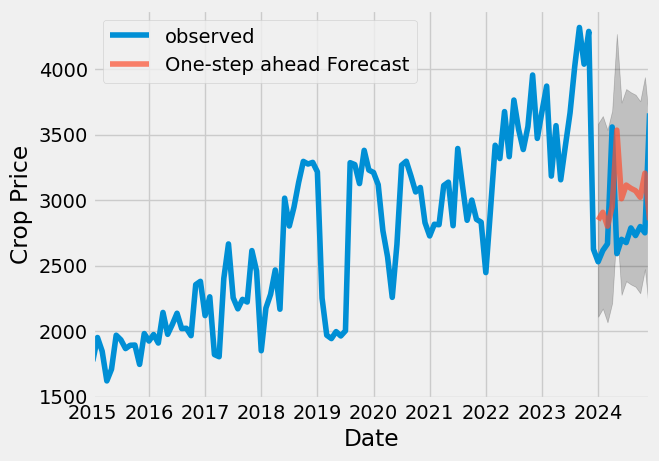

In [14]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Crop Price')
plt.legend()

plt.show()

In [15]:
y_forecasted = pred.predicted_mean
y_truth = y['2024-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 240409.91


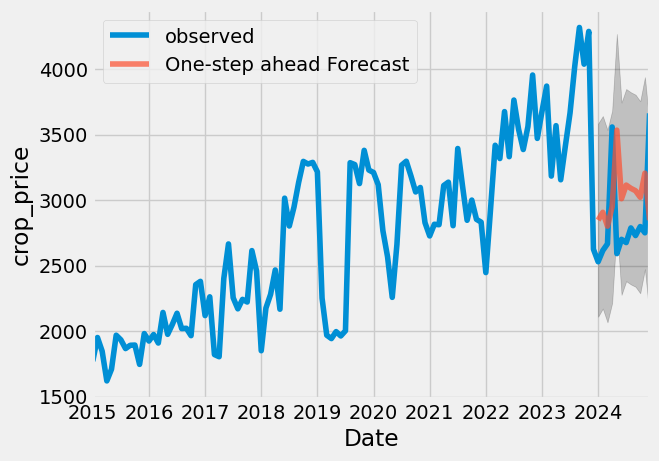

In [16]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('crop_price')
plt.legend()

plt.show()

In [17]:
y_forecasted = pred.predicted_mean
y_truth = y['2024-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 240409.91


In [18]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2024-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

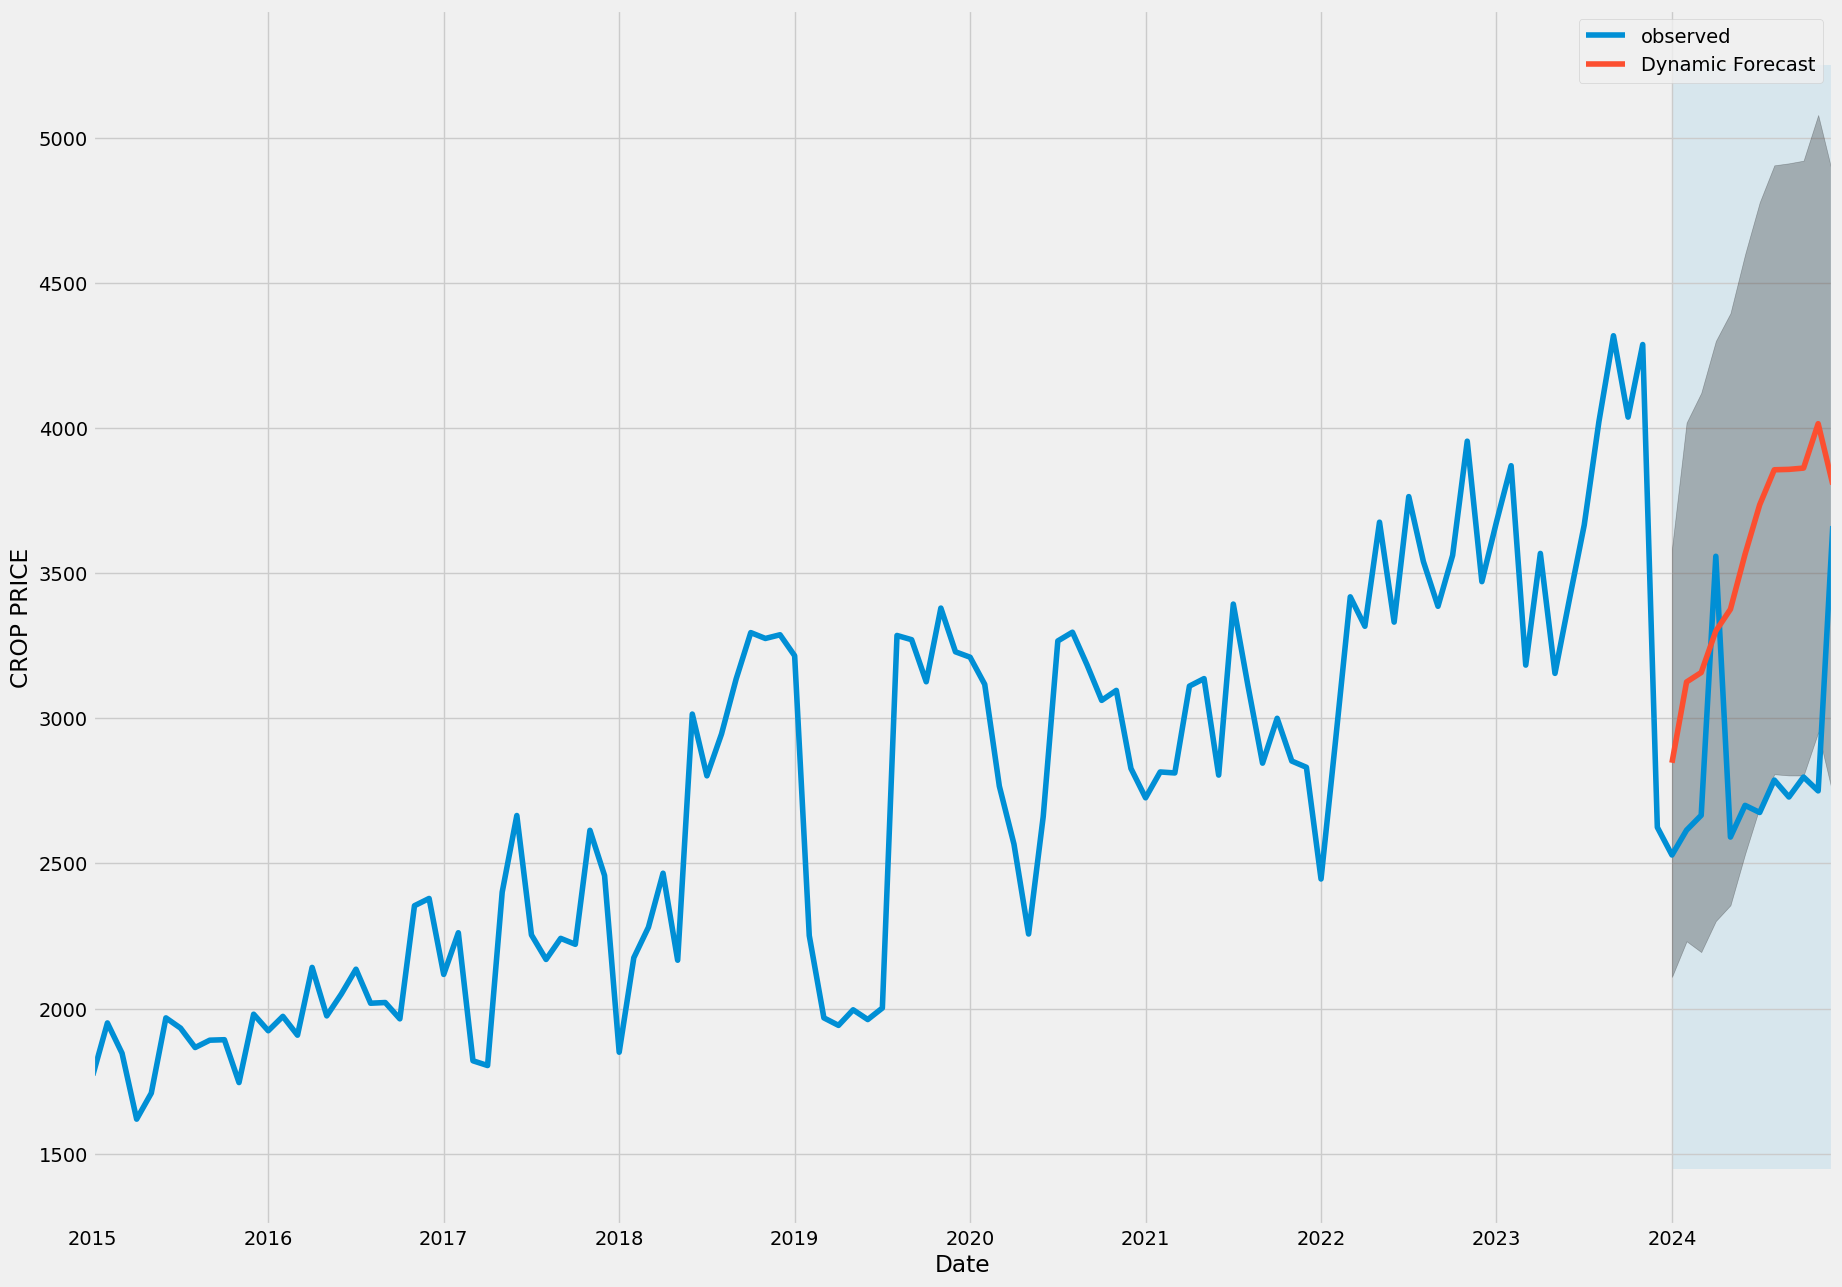

In [19]:
ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2024-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CROP PRICE')

plt.legend()
plt.show()

In [20]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2024-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 694156.29


<b>Forecast of 20 steps ahead in future<b>


In [21]:
# Get forecast 20 steps ahead in future
pred_uc = results.get_forecast(steps=20)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

<b>The predicted prices are:<b>


In [22]:
pred_ci

,lower Modal_Price,upper Modal_Price
2025-01-01,2732.450339,4198.072360
2025-02-01,2583.492790,4358.241400
2025-03-01,2353.001972,4265.233526
2025-04-01,2408.074965,4390.969502
2025-05-01,2314.504196,4337.842143
2025-06-01,2445.864267,4494.738104
2025-07-01,2571.442399,4638.001245
2025-08-01,2676.826110,4756.713913
2025-09-01,2670.271384,4760.972236
2025-10-01,2654.501205,4754.524001


<b>Save the csv in desired location<b>


In [23]:
pred_ci.to_csv("./Output/Test_Pred.csv")

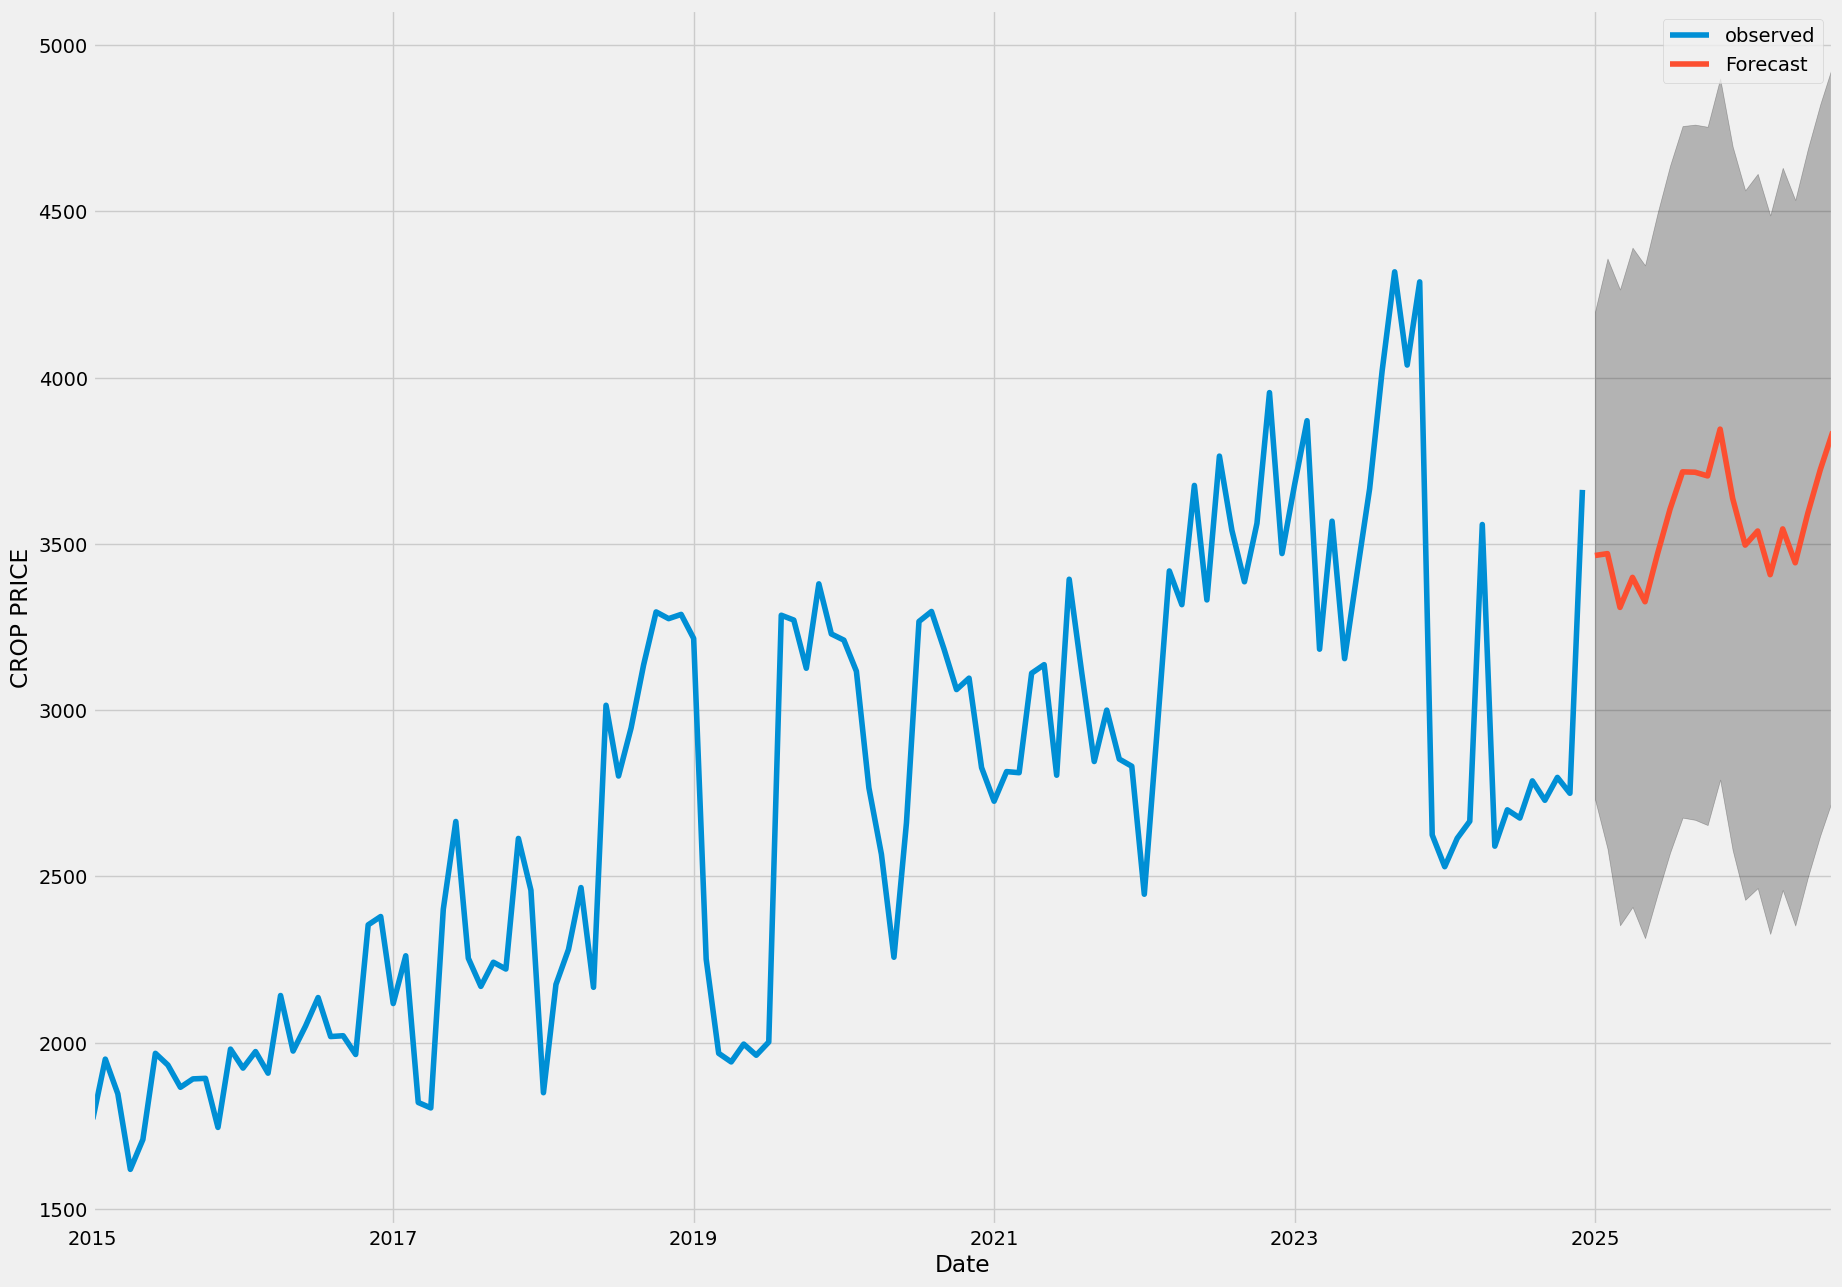

In [24]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CROP PRICE') 

plt.legend()
plt.show()